<a href="https://colab.research.google.com/github/Lodnar123/Autoencoder/blob/main/%D0%94%D0%97_Lite_%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B0_(Autoencoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Используйте готовый ноутбук с занятия:
1. Обучите автокодировщик на 10 выбранных вами красивых цифрах 5 и отредактируйте с помощью него все остальные цифры 5
2. Напишите 3 автокодировщика для подавления шума с собственными архитектурами. Сравните их между собой и с исходным шумоподавляющим атокодировщиком. Сравнивайте по квадрату разности исходной картинки с востановленной из шума
3. Обучите автокодировщик на базе Fashion Mnist, проверьте, как он преобразует картинки одежды, на которых не обучался

## Импорт библиотек


In [ ]:
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, UpSampling2D,  concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Concatenate
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import utils
from keras.utils import plot_model
from PIL import Image

%matplotlib inline

## Загрузка данных

In [ ]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Нормировка
X_train = X_train.astype('float32')/255.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')/255.
X_test = X_test.reshape(-1, 28, 28, 1)

## Создание модели и обучение

In [ ]:
def baseAutoencoder():
    img_input = Input(shape=(X_train.shape[1:]))

    encoder = Conv2D(8, (3, 3), padding = 'same', activation = 'relu')(img_input)
    encoder = BatchNormalization()(encoder)
    encoder = MaxPooling2D()(encoder)

    encoder = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(encoder)
    encoder = BatchNormalization()(encoder)
    encoder = MaxPooling2D()(encoder)

    decoder = Conv2DTranspose(16, (2, 2), strides = (2, 2), padding = 'same', activation = 'relu', name = 'decoder_1')(encoder)
    decoder = BatchNormalization()(decoder)

    decoder = Conv2D(16, (3, 3), padding = 'same', activation = 'relu', name = 'decoder_2')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Conv2DTranspose(8, (2, 2), strides = (2, 2), padding = 'same', activation = 'relu')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Conv2D(8, (3, 3), padding = 'same', activation = 'relu')(decoder)
    decoder = BatchNormalization()(decoder)


    outputs = Conv2D(X_train.shape[1:][-1], (3, 3), activation = 'sigmoid', padding = 'same')(decoder)

    autoencoder = Model(img_input, outputs)

    autoencoder.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mse')\

    return autoencoder

In [ ]:
modelAutoMnist = baseAutoencoder()

modelAutoMnist.fit(X_train[10000:], X_train[10000:],
                    epochs = 50,
                    batch_size = 200,
                    validation_data = (X_train[10000:12000], X_train[10000:12000]))

Epoch 1/50
250/250 [==============================] - 21s 16ms/step - loss: 0.0521 - val_loss: 0.1056
Epoch 2/50
250/250 [==============================] - 3s 12ms/step - loss: 0.0090 - val_loss: 0.0123
Epoch 3/50
250/250 [==============================] - 2s 9ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 8/50
250/250 [==============================] - 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/50
250/250 [==============================] - 2s 9ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0026 - val_loss: 0.

In [ ]:
predMnist = modelAutoMnist.predict(X_train[:12000])
predMnist = predMnist*255
predMnist = predMnist.astype('uint8')

375/375 [==============================] - 1s 2ms/step


In [ ]:
def plotImages(startIndex, xTrain, pred):
    n = 10
    plt.figure(figsize=(10,4))
    for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2,n,i+1)
      plt.imshow(xTrain[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2,n,i+1+n)
      plt.imshow(pred[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def Any10Images(startIndex, xTrain):
    n = 10
    plt.figure(figsize=(15,8))
    for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2,n,i+1)
      plt.imshow(xTrain[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
def getMSE(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Задание 1.

Обычные пятерки из X_train выглядят так:



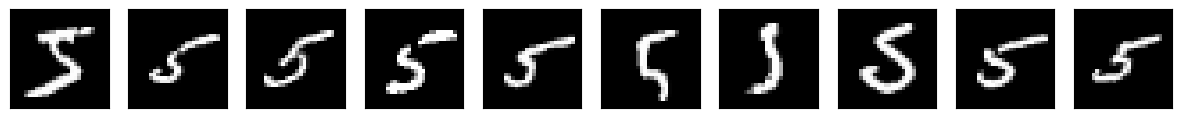


Красивые пятерки выглядят так:



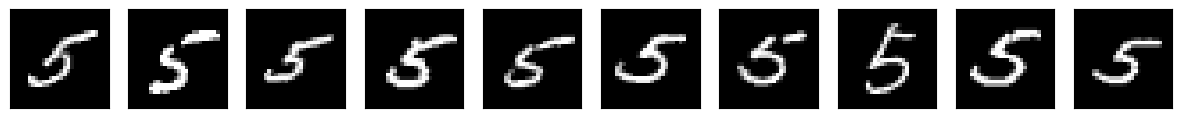


Всего в выборке 5421 пятерок.
Epoch 1/20
500/500 [==============================] - 7s 7ms/step - loss: 0.0794 - val_loss: 0.0614
Epoch 2/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0419 - val_loss: 0.0424
Epoch 3/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0398 - val_loss: 0.0412
Epoch 4/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0387 - val_loss: 0.0404
Epoch 5/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0381 - val_loss: 0.0381
Epoch 6/20
500/500 [==============================] - 4s 9ms/step - loss: 0.0377 - val_loss: 0.0378
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 0.0374 - val_loss: 0.0374
Epoch 8/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0372 - val_loss: 0.0379
Epoch 9/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0370 - val_loss: 0.0375
Epoch 10/20
500/500 [==============================] - 4s 8ms/step - 

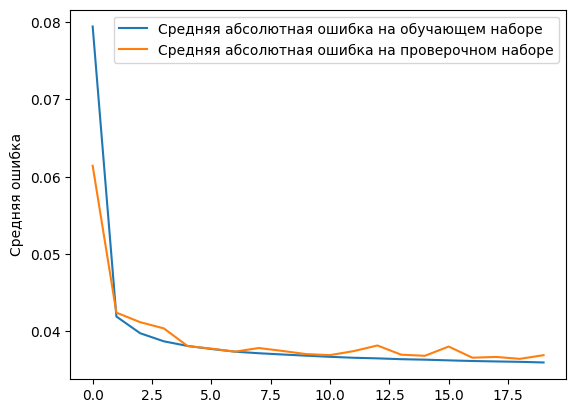

In [ ]:
# Создаем список красивых пятерок
X_trainBeauty5 = np.array([X_train[35],X_train[47],X_train[173],X_train[175],X_train[191],X_train[287],X_train[335],X_train[396], X_train[403], X_train[417]])
y_trainBeauty5 = np.array([5,5,5,5,5,5,5,5,5,5])


# Создаем список всех пятерок из X_train
X_train_5 = []
for i in range(len(X_train)):
  if (y_train[i] == 5): X_train_5.append(X_train[i])

# Визуализируем
print('Обычные пятерки из X_train выглядят так:\n')
Any10Images(0, X_train_5)
print()
print('Красивые пятерки выглядят так:\n')

plt.figure(figsize = (15,8))
for i in range(10):
  ax = plt.subplot(2,10,i+1)
  plt.imshow(X_trainBeauty5[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

print()
print(f'Всего в выборке {len(X_train_5)} пятерок.')


X_train_5 = np.array(X_train_5)

xEtalonTrain = np.array(X_trainBeauty5)
while len(xEtalonTrain) < (len(X_train_5)-1):
  xEtalonTrain = np.concatenate((xEtalonTrain, X_trainBeauty5))



# Нормализация
X_train_5 = X_train_5.astype('float32')/255.
X_train_5 = X_train_5.reshape(X_train_5.shape[0], 28, 28, 1)
X_trainBeauty5 = X_trainBeauty5.astype('float32')/255.
X_trainBeauty5 = X_trainBeauty5.reshape(X_trainBeauty5.shape[0], 28, 28, 1)

#Автокодировщик
modelAutoencoder_Mnist = baseAutoencoder()

history_1 = modelAutoencoder_Mnist.fit(X_train_5[:5000],
                                        xEtalonTrain[:5000],
                                        epochs = 20,
                                        batch_size = 10,
                                        validation_data = (X_train_5[5000:5420],xEtalonTrain[5000:5420]))

plt.plot(history_1.history['loss'],label="Средняя абсолютная ошибка на обучающем наборе")
plt.plot(history_1.history['val_loss'],label="Средняя абсолютная ошибка на проверочном наборе")
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

170/170 [==============================] - 1s 3ms/step


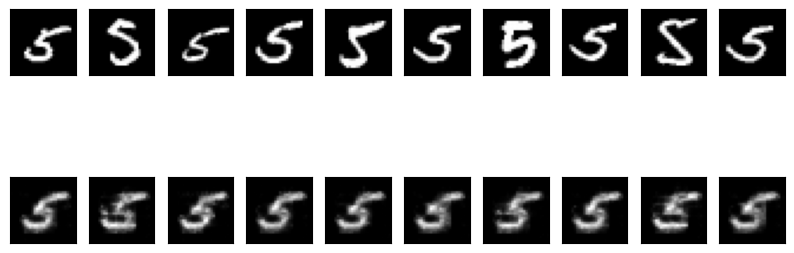

In [ ]:
#Теперь переделаем все пятерки в выборке xBeautyMod5
ModifiedBeauty = modelAutoencoder_Mnist.predict(X_train_5[:5420])
ModifiedBeauty = ModifiedBeauty*255
ModifiedBeauty = ModifiedBeauty.astype('uint8')

plotImages(10,X_train_5,ModifiedBeauty)

# Задание 2

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0,size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

x_train_noisy  = x_train_noisy.astype('float32')/255.
x_train_noisy  = x_train_noisy.reshape(-1, 28, 28, 1)
x_test_noisy = x_test_noisy.astype('float32')/255.
x_test_noisy = x_test_noisy.reshape(-1, 28, 28, 1)

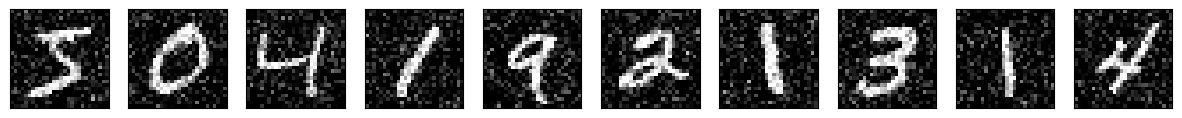

In [ ]:
Any10Images(0, x_train_noisy)

# Автокодировщик 1.

In [ ]:
def autoencoder_1():
  input_img = Input(shape=(28, 28, 1))

  encoded = Conv2D(32, (3, 3), strides = 2, padding = 'same', activation = 'relu')(input_img)
  encoded = Conv2D(64, (3, 3), strides = 2, padding = 'same', activation = 'relu')(input_img)
  encoded = BatchNormalization()(encoded)
  encoded = Flatten()(encoded)

  encoded = Dense(16, activation='relu')(encoded)
  encoded = Dense(7*7*64, activation = 'relu')(encoded)

  encoded = Reshape((7,7,64))(encoded)

  decoded = Conv2DTranspose(64,(3,3), strides=2, padding='same',activation='relu')(encoded)
  encoded = BatchNormalization()(decoded)
  decoded = Conv2DTranspose(32,(3,3), strides=2, padding='same',activation='relu')(encoded)

  decoded = Conv2D(1,(3,3),activation='sigmoid', padding='same')(decoded)
  autoencoder1 = Model(input_img, decoded)

  autoencoder1.compile(optimizer='adam', loss='mean_squared_error')

  return autoencoder1

In [ ]:
model_1 = autoencoder_1()

model_1.fit(x_train_noisy[:50000], X_train[:50000],
                    epochs = 50,
                    batch_size = 120,
                    validation_data = (x_train_noisy[50000:], X_train[50000:]))

Epoch 1/50
417/417 [==============================] - 8s 11ms/step - loss: 0.0440 - val_loss: 0.0829
Epoch 2/50
417/417 [==============================] - 4s 9ms/step - loss: 0.0174 - val_loss: 0.0166
Epoch 3/50
417/417 [==============================] - 4s 10ms/step - loss: 0.0157 - val_loss: 0.0149
Epoch 4/50
417/417 [==============================] - 4s 9ms/step - loss: 0.0148 - val_loss: 0.0144
Epoch 5/50
417/417 [==============================] - 4s 9ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 6/50
417/417 [==============================] - 4s 10ms/step - loss: 0.0139 - val_loss: 0.0143
Epoch 7/50
417/417 [==============================] - 4s 10ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 8/50
417/417 [==============================] - 4s 9ms/step - loss: 0.0133 - val_loss: 0.0135
Epoch 9/50
417/417 [==============================] - 4s 10ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 10/50
417/417 [==============================] - 4s 10ms/step - loss: 0.0130 - val_loss: 

1563/1563 [==============================] - 5s 3ms/step


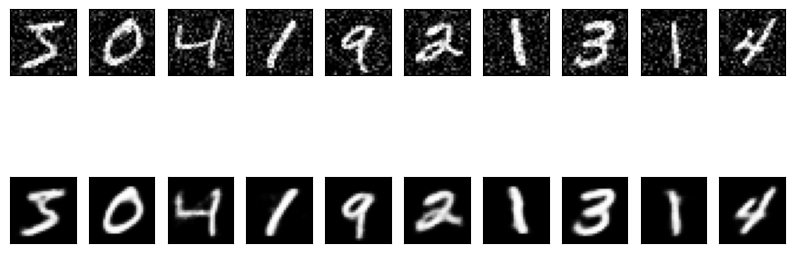

Ошибка на Автокодировщике 1 по сравнению с оригиналом составит
0.015668176179882625
0.015720327402631427


In [ ]:
predModel_1 = model_1.predict(x_train_noisy[:50000])
predModel_1 = predModel_1 * 255
predModel_1 = predModel_1.astype('uint8')

plotImages(0, x_train_noisy, predModel_1)

err = [getMSE(X_train[i],predModel_1[i]/255) for i in range(len(predModel_1))]
n = 10000
print("Ошибка на Автокодировщике 1 по сравнению с оригиналом составит")
print(sum(err[0:n])/n)
print(sum(err[10000:10000+n])/n)

# Автокодировщик 2.

In [ ]:
def autoencoder_2():
  input_img = Input(shape=(28, 28, 1))

  x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)

  encoded = MaxPooling2D((2, 2), padding='same')(x)

  x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)

  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder2 = Model(input_img, decoded)

  autoencoder2.compile(optimizer='adam', loss='mean_squared_error')

  return autoencoder2

In [ ]:
model_2 = autoencoder_2()

model_2.fit(x_train_noisy[:50000], X_train[:50000],
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (x_train_noisy[50000:], X_train[50000:]))

Epoch 1/50
391/391 [==============================] - 7s 10ms/step - loss: 0.0398 - val_loss: 0.0832
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 0.0098 - val_loss: 0.0108
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0079 - val_loss: 0.0104
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0071 - val_loss: 0.0105
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0058 - val_loss: 0.0138
Epoch 8/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0056 - val_loss: 0.0202
Epoch 9/50
391/391 [==============================] - 4s 10ms/step - loss: 0.0055 - val_loss: 0.0066
Epoch 10/50
391/391 [==============================] - 3s 9ms/step - loss: 0.0053 - val_loss: 0.0

1563/1563 [==============================] - 5s 3ms/step


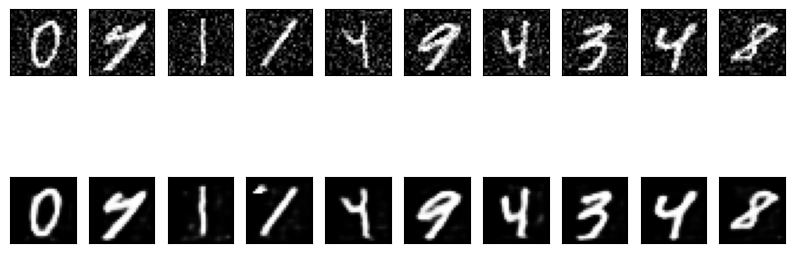

Ошибка на Автокодировщике 1 по сравнению с оригиналом составит
0.012461131379119934
0.012266904964679444


In [ ]:
predModel_2 = model_2.predict(x_train_noisy[:50000])
predModel_2 = predModel_2 * 255
predModel_2 = predModel_2.astype('uint8')

plotImages(1000, x_train_noisy, predModel_2)

err = [getMSE(X_train[i],predModel_2[i]/255) for i in range(len(predModel_2))]
n = 1000
print("Ошибка на Автокодировщике 1 по сравнению с оригиналом составит")
print(sum(err[0:n])/n)
print(sum(err[10000:10000+n])/n)

# Автокодировщик 3.

In [ ]:
def autoencoder_3():
  input_img = Input(shape=(28, 28, 1))

  encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  encoded = MaxPooling2D((2, 2), padding='same')(encoded)
  encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  encoded = MaxPooling2D((2, 2), padding='same')(encoded)

  decoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  decoded = UpSampling2D((2, 2))(decoded)
  decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
  decoded = UpSampling2D((2, 2))(decoded)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

  autoencoder3 = Model(input_img, decoded)

  autoencoder3.compile(optimizer='adam', loss='mean_squared_error')

  return autoencoder3

In [ ]:
model_3 = autoencoder_3()

model_3.fit(x_train_noisy[:50000], X_train[:50000],
                    epochs = 50,
                    batch_size = 256,
                    validation_data = (x_train_noisy[50000:], X_train[50000:]))

Epoch 1/50
196/196 [==============================] - 8s 10ms/step - loss: 0.1150 - val_loss: 0.0707
Epoch 2/50
196/196 [==============================] - 1s 7ms/step - loss: 0.0703 - val_loss: 0.0694
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0701 - val_loss: 0.0693
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 0.0700 - val_loss: 0.0692
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 0.0699 - val_loss: 0.0692
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0698 - val_loss: 0.0690
Epoch 7/50
196/196 [==============================] - 2s 9ms/step - loss: 0.0695 - val_loss: 0.0681
Epoch 8/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0607 - val_loss: 0.0443
Epoch 9/50
196/196 [==============================] - 1s 7ms/step - loss: 0.0354 - val_loss: 0.0307
Epoch 10/50
196/196 [==============================] - 1s 7ms/step - loss: 0.0274 - val_loss: 0.02

1563/1563 [==============================] - 5s 3ms/step


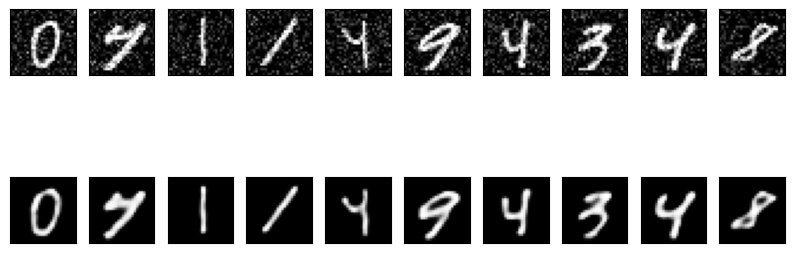

Ошибка на Автокодировщике 1 по сравнению с оригиналом составит
0.007427878003878797
0.007175926141037313


In [ ]:
predModel_3 = model_3.predict(x_train_noisy[:50000])
predModel_3 = predModel_3 * 255
predModel_3 = predModel_3.astype('uint8')

plotImages(1000, x_train_noisy, predModel_3)

err = [getMSE(X_train[i],predModel_3[i]/255) for i in range(len(predModel_3))]
n = 1000
print("Ошибка на Автокодировщике 1 по сравнению с оригиналом составит")
print(sum(err[0:n])/n)
print(sum(err[10000:10000+n])/n)

# Задание 3

In [ ]:
(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()
xTrainMnistF = xTrainMnistF.astype('float32')/255 # представляем в виде значений от 0 до 1
xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1) # меняем форму, приводим к нужным нам размерам

Класс изображения: 9.



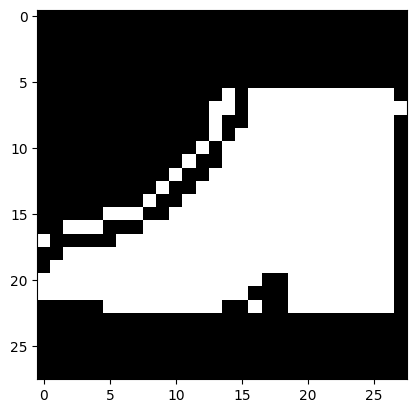

In [ ]:
n = 651
xT = xTrainMnistF[n].reshape((28, 28))
xT *= 255

print(f"Класс изображения: {yTrainMnistF[n]}.")
print()

img = Image.fromarray(xT)
plt.imshow(img.convert('RGBA'))
plt.show()



In [ ]:
x_train = xTrainMnistF[yTrainMnistF != 9]

x_train = x_train.astype('float32')/255
x_train = x_train.reshape(-1, 28, 28, 1)

In [ ]:
modelAutoencoderFMnist = baseAutoencoder ()
modelAutoencoderFMnist.fit(x_train[:50000],
                           x_train[:50000],
                           epochs = 50,
                           batch_size = 128,
                           validation_data = (x_train[50000:], x_train[50000:]))

Epoch 1/50
391/391 [==============================] - 8s 9ms/step - loss: 0.0424 - val_loss: 0.0059
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 5.3070e-04 - val_loss: 3.2096e-04
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7444e-04 - val_loss: 1.1136e-04
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 8.6457e-05 - val_loss: 5.7200e-05
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 5.1840e-05 - val_loss: 3.9156e-05
Epoch 6/50
391/391 [==============================] - 4s 9ms/step - loss: 3.4630e-05 - val_loss: 2.2446e-05
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 2.4858e-05 - val_loss: 1.4500e-05
Epoch 8/50
391/391 [==============================] - 3s 7ms/step - loss: 2.0003e-05 - val_loss: 1.0401e-05
Epoch 9/50
391/391 [==============================] - 3s 8ms/step - loss: 1.5393e-05 - val_loss: 3.1927e-05
Epoch 10/50
391/391 [==============

4/4 [==============================] - 0s 3ms/step


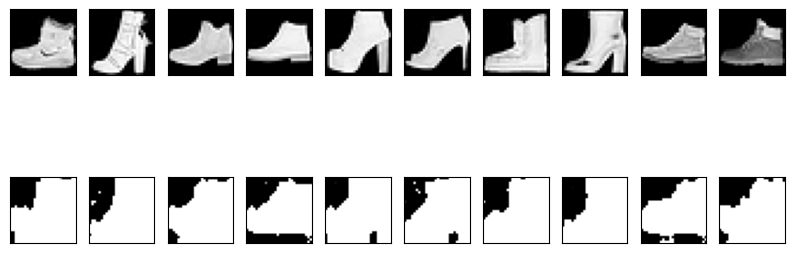

In [ ]:
x_train_9 = xTrainMnistF[yTrainMnistF == 9]

predMnistF = modelAutoencoderFMnist.predict(x_train_9[:100])
predMnistF = predMnistF * 255
predMnistF = predMnistF.astype('uint8')

plotImages(0, x_train_9, predMnistF)
